In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
import sklearn
import os
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split



In [26]:
df=pd.read_csv("train.csv")

df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Esploriamo struttura e prime righe
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Controllo duplicati
df.duplicated().sum() #Nessun duplicato


np.int64(0)

In [36]:
#Analisi valori unici e conteggio per ogni colonna
for col in df.columns:
    print("\n========================")
    print(f"Colonna: {col}")
    print("------------------------")
    #print("Valori unici:")
    #print(df[col].unique())

    #print("\nConteggio valori:")
    #print(df[col].value_counts(dropna=False))

    print(f"\nNumero di valori unici: {df[col].nunique()}")



Colonna: PassengerId
------------------------

Numero di valori unici: 891

Colonna: Survived
------------------------

Numero di valori unici: 2

Colonna: Pclass
------------------------

Numero di valori unici: 3

Colonna: Name
------------------------

Numero di valori unici: 891

Colonna: Sex
------------------------

Numero di valori unici: 2

Colonna: Age
------------------------

Numero di valori unici: 88

Colonna: SibSp
------------------------

Numero di valori unici: 7

Colonna: Parch
------------------------

Numero di valori unici: 7

Colonna: Ticket
------------------------

Numero di valori unici: 681

Colonna: Fare
------------------------

Numero di valori unici: 248

Colonna: Cabin
------------------------

Numero di valori unici: 147

Colonna: Embarked
------------------------

Numero di valori unici: 3


In [37]:
df['Ticket'].tolist()


['A/5 21171',
 'PC 17599',
 'STON/O2. 3101282',
 '113803',
 '373450',
 '330877',
 '17463',
 '349909',
 '347742',
 '237736',
 'PP 9549',
 '113783',
 'A/5. 2151',
 '347082',
 '350406',
 '248706',
 '382652',
 '244373',
 '345763',
 '2649',
 '239865',
 '248698',
 '330923',
 '113788',
 '349909',
 '347077',
 '2631',
 '19950',
 '330959',
 '349216',
 'PC 17601',
 'PC 17569',
 '335677',
 'C.A. 24579',
 'PC 17604',
 '113789',
 '2677',
 'A./5. 2152',
 '345764',
 '2651',
 '7546',
 '11668',
 '349253',
 'SC/Paris 2123',
 '330958',
 'S.C./A.4. 23567',
 '370371',
 '14311',
 '2662',
 '349237',
 '3101295',
 'A/4. 39886',
 'PC 17572',
 '2926',
 '113509',
 '19947',
 'C.A. 31026',
 '2697',
 'C.A. 34651',
 'CA 2144',
 '2669',
 '113572',
 '36973',
 '347088',
 'PC 17605',
 '2661',
 'C.A. 29395',
 'S.P. 3464',
 '3101281',
 '315151',
 'C.A. 33111',
 'CA 2144',
 'S.O.C. 14879',
 '2680',
 '1601',
 '348123',
 '349208',
 '374746',
 '248738',
 '364516',
 '345767',
 '345779',
 '330932',
 '113059',
 'SO/C 14885',
 '310

In [38]:
df = df.drop(columns=['Ticket',"PassengerId","Name"])


In [39]:
#Controllo valori mancanti
df.isna().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [40]:
#Percentuale valori mancanti
(df.isna().mean() * 100).round(2)


Survived     0.00
Pclass       0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64

In [122]:
df[df['Embarked'].isna()]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_num,bambino,molto_vecchio
61,1,1,female,38.0,0,0,80.0,NaN,0,0,0
829,1,1,female,62.0,0,0,80.0,NaN,0,0,0


In [124]:
df['Embarked'] = df['Embarked'].fillna('C')


In [41]:
# In base ai dati sopra visti, possiamo notare che le colonne 'Age', 'Cabin' e 'Embarked' presentano valori mancanti. 
# La colonna 'Cabin' ha una percentuale molto alta di valori mancanti, quindi potrebbe essere utile considerare se eliminarla o imputare i valori in modo appropriato. 
# Le colonne 'Age' e 'Embarked' hanno una percentuale più bassa di valori mancanti, quindi possiamo considerare di imputare questi valori con la media o la moda, rispettivamente.

df = df.drop(columns=['Cabin']) # Rimuoviamo la colonna 'Cabin' a causa dell'elevata percentuale di valori mancanti




In [43]:
#Vediamo se c'è una correlazione tra 'Parch' e 'Age' per i valori mancanti in 'Age'
df[df['Age'].isna()]['Parch'].value_counts()


Parch
0    157
2     12
1      8
Name: count, dtype: int64

In [42]:
df.groupby('Parch')['Age'].apply(lambda x: x.isna().sum())


Parch
0    157
1      8
2     12
3      0
4      0
5      0
6      0
Name: Age, dtype: int64

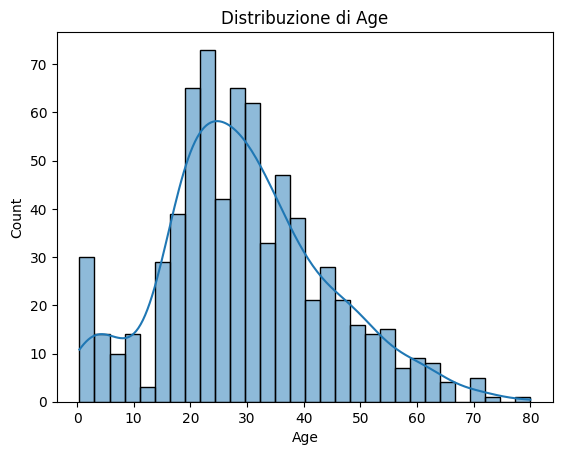

In [44]:
#Distribuzione di Age
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Distribuzione di Age')
plt.show()

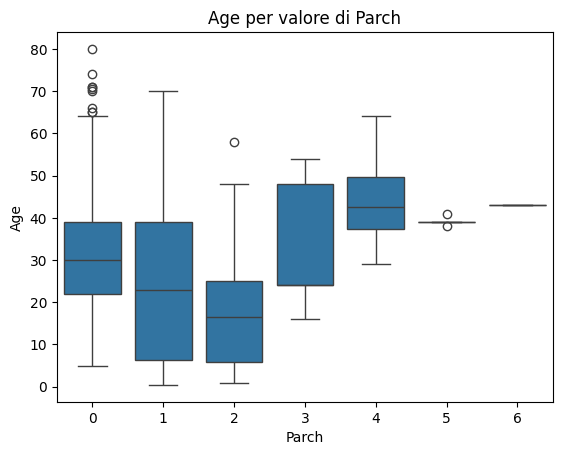

In [15]:
sns.boxplot(data=df, x='Parch', y='Age')
plt.title('Age per valore di Parch')
plt.show()

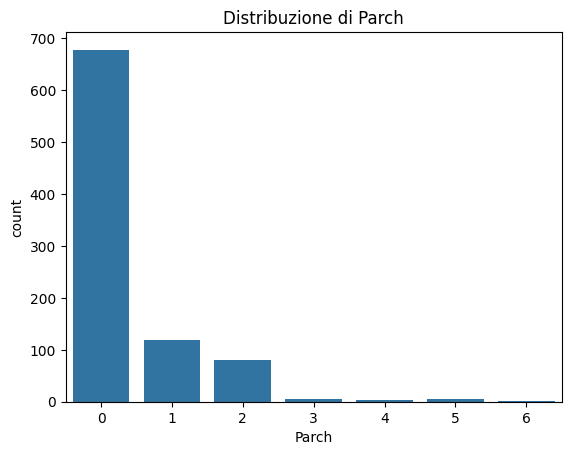

In [16]:
sns.countplot(data=df, x='Parch')
plt.title('Distribuzione di Parch')
plt.show()


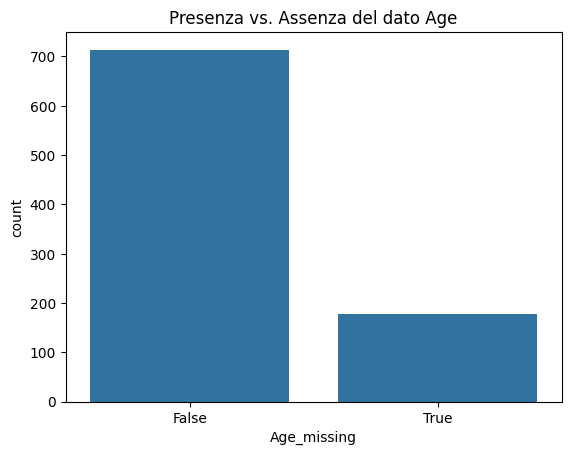

In [17]:
df['Age_missing'] = df['Age'].isna()

sns.countplot(data=df, x='Age_missing')
plt.title('Presenza vs. Assenza del dato Age')
plt.show()


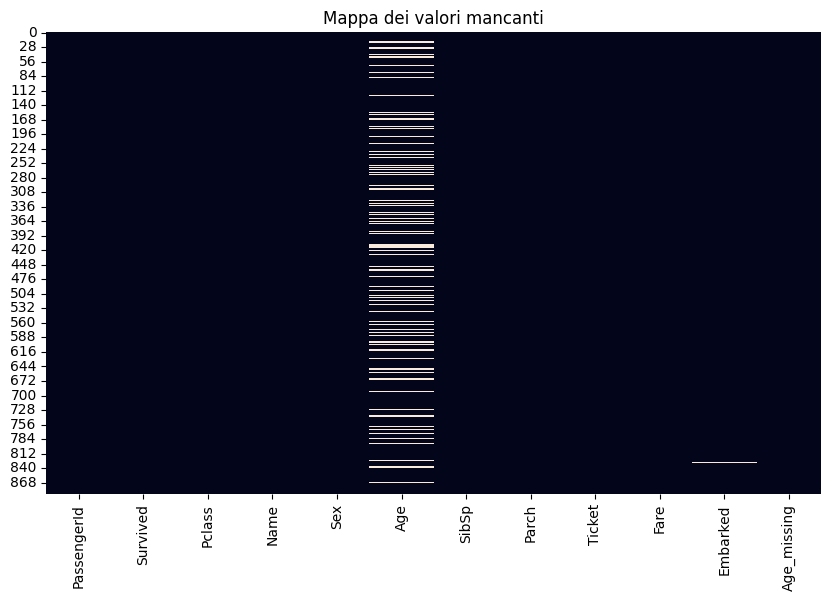

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False)
plt.title('Mappa dei valori mancanti')
plt.show()


In [21]:
#Dal grafico di cui sopra, sembra non esserci una correlazione evidente tra la presenza di valori mancanti in 'Age' e altre variabili nel dataset. 
# Tuttavia, possiamo notare che i valori mancanti in 'Age' sono distribuiti in modo casuale tra le altre colonne, senza un pattern chiaro.
df=df.drop(columns=['Age_missing'])

In [45]:
df['Sex_num'] = df['Sex'].map({'male': 1, 'female': 0})


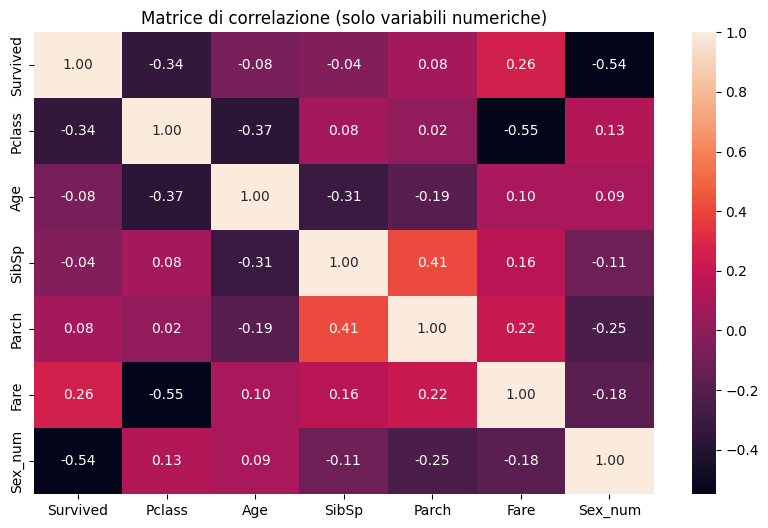

In [46]:
corr = df.corr(numeric_only=True)
corr
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Matrice di correlazione (solo variabili numeriche)')
plt.show()


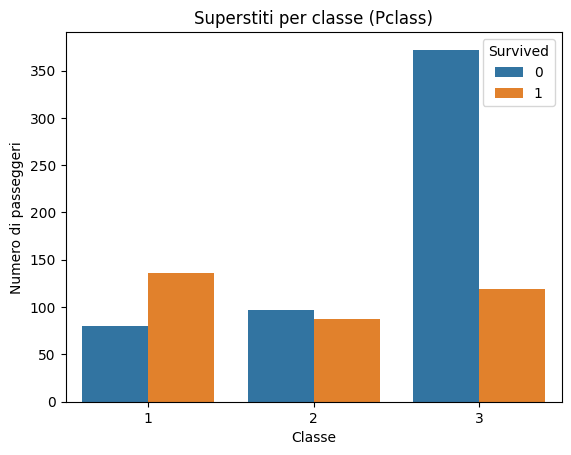

In [27]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Superstiti per classe (Pclass)')
plt.xlabel('Classe')
plt.ylabel('Numero di passeggeri')
plt.show()

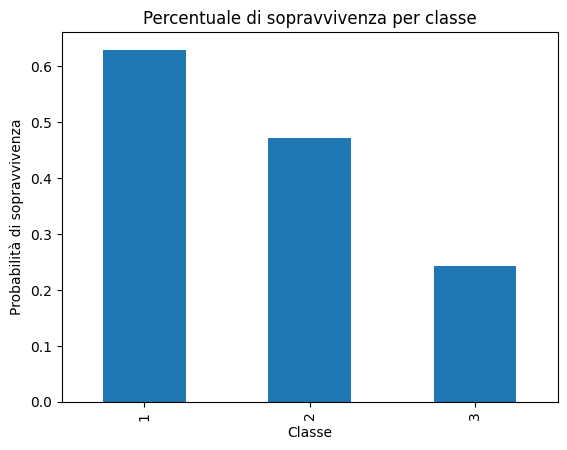

In [28]:
survival_rate = df.groupby('Pclass')['Survived'].mean()

survival_rate.plot(kind='bar')
plt.title('Percentuale di sopravvivenza per classe')
plt.ylabel('Probabilità di sopravvivenza')
plt.xlabel('Classe')
plt.show()

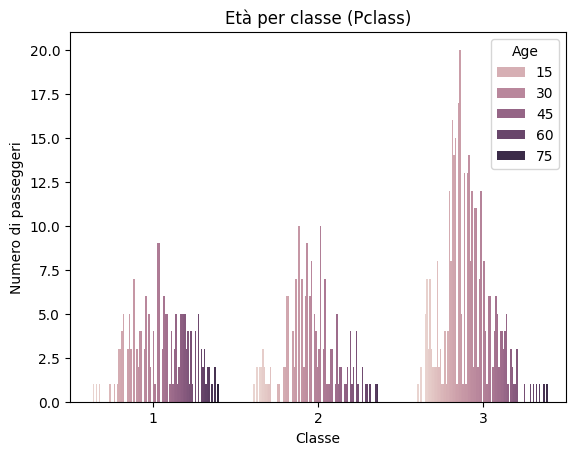

In [29]:
sns.countplot(data=df, x='Pclass', hue='Age')
plt.title('Età per classe (Pclass)')
plt.xlabel('Classe')
plt.ylabel('Numero di passeggeri')
plt.show()

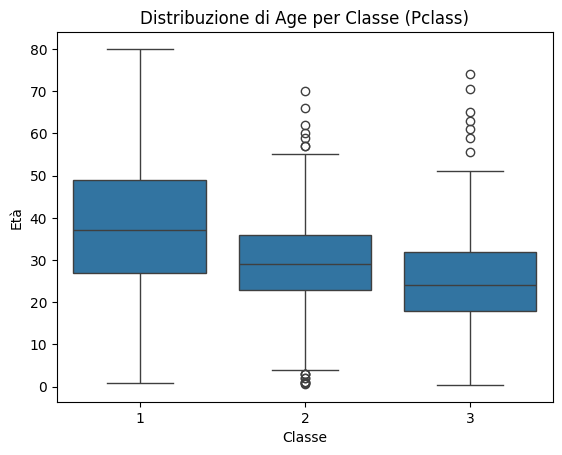

In [30]:
sns.boxplot(data=df, x='Pclass', y='Age')
plt.title('Distribuzione di Age per Classe (Pclass)')
plt.xlabel('Classe')
plt.ylabel('Età')
plt.show()

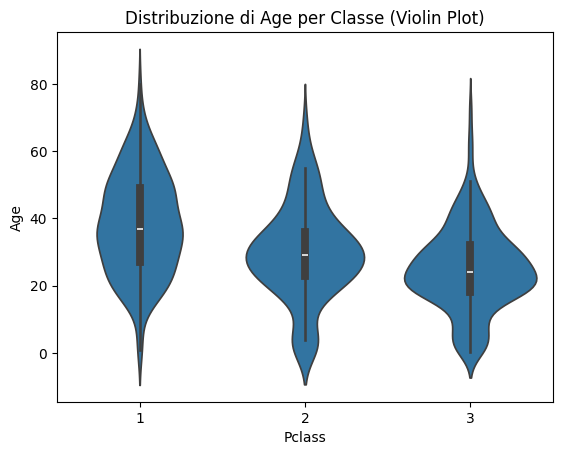

In [31]:
sns.violinplot(data=df, x='Pclass', y='Age')
plt.title('Distribuzione di Age per Classe (Violin Plot)')
plt.show()

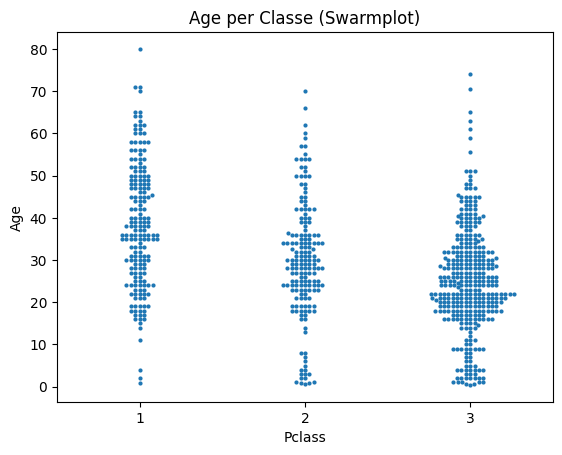

In [32]:
sns.swarmplot(data=df, x='Pclass', y='Age', size=3)
plt.title('Age per Classe (Swarmplot)')
plt.show()


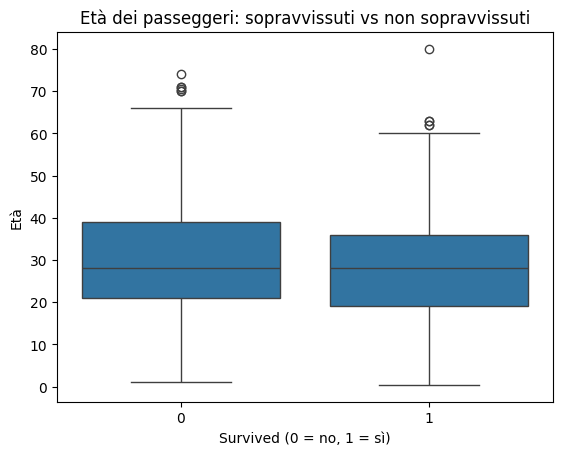

In [47]:
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Età dei passeggeri: sopravvissuti vs non sopravvissuti')
plt.xlabel('Survived (0 = no, 1 = sì)')
plt.ylabel('Età')
plt.show()

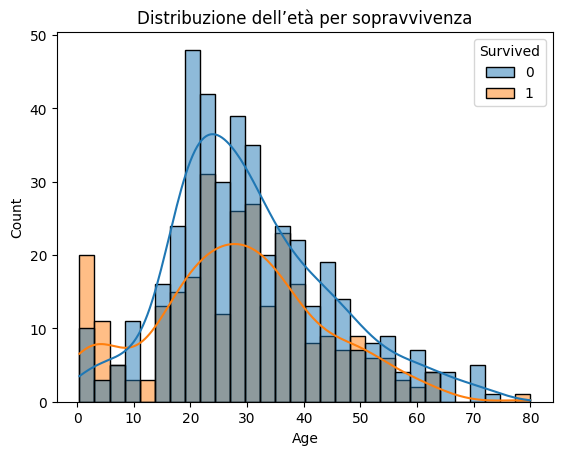

In [48]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Distribuzione dell’età per sopravvivenza')
plt.show()


In [75]:
bins = [0, 9, 12, 15, 20, 30, 40, 60, 120]
labels = ['0-9', '9-12', '12-15', '15-20', '20-30', '30-40', '40-60', '60+']

df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_survival_counts = df.groupby(['Age_group', 'Survived']).size().unstack(fill_value=0)
age_survival_counts




C:\Users\Gianmario\AppData\Local\Temp\ipykernel_9364\2841540118.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_counts = df.groupby(['Age_group', 'Survived']).size().unstack(fill_value=0)


Survived,0,1
Age_group,,
0-9,18,36
9-12,11,3
12-15,4,6
15-20,52,34
20-30,143,77
30-40,94,73
40-60,83,54
60+,19,7


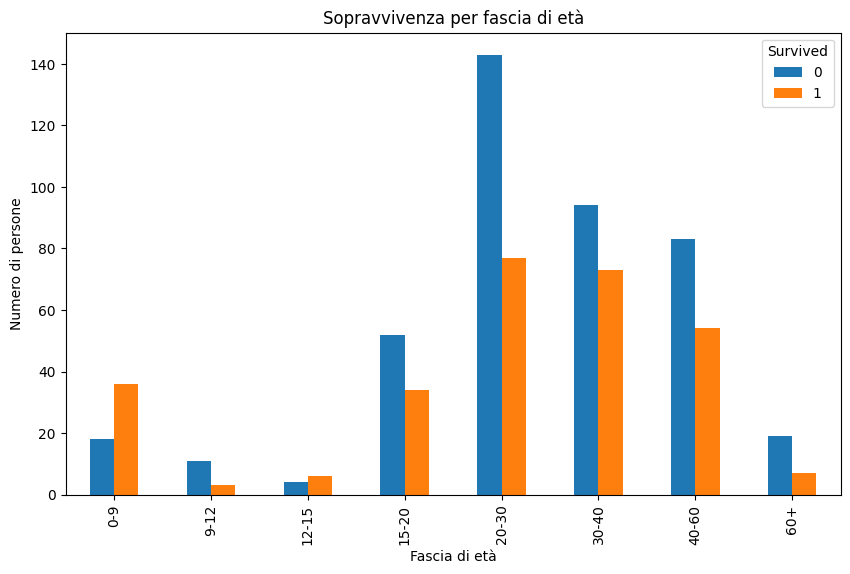

In [76]:
age_survival_counts.plot(kind='bar', figsize=(10,6))
plt.title('Sopravvivenza per fascia di età')
plt.xlabel('Fascia di età')
plt.ylabel('Numero di persone')
plt.show()


In [78]:
age_survival_rate = df.groupby('Age_group')['Survived'].mean() * 100
age_survival_rate


C:\Users\Gianmario\AppData\Local\Temp\ipykernel_9364\4040021992.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_rate = df.groupby('Age_group')['Survived'].mean() * 100


Age_group
0-9      66.666667
9-12     21.428571
12-15    60.000000
15-20    39.534884
20-30    35.000000
30-40    43.712575
40-60    39.416058
60+      26.923077
Name: Survived, dtype: float64

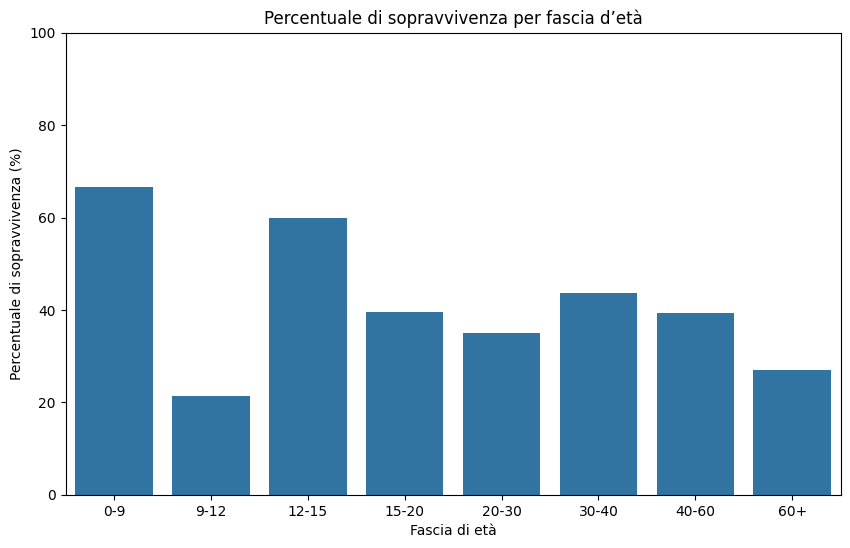

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(x=age_survival_rate.index, y=age_survival_rate.values)
plt.title('Percentuale di sopravvivenza per fascia d’età')
plt.xlabel('Fascia di età')
plt.ylabel('Percentuale di sopravvivenza (%)')
plt.ylim(0,100)
plt.show()

In [86]:
df[df['Age'] > 65].shape[0]
df[df['Age'] > 65]['Survived'].value_counts()


Survived
0    7
1    1
Name: count, dtype: int64

In [ ]:
missing_age = df[df['Age'].isna()]
missing_age['Survived'].value_counts()


np.float64(29.37853107344633)

In [93]:
# Donne ricche
donne_ricche = df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]

# Bambini ricchi
bambini_ricchi = df[(df['Age'] < 12) & (df['Pclass'] == 1)]

# Bambini poveri
bambini_poveri = df[(df['Age'] < 12) & (df['Pclass'] == 3)]


In [91]:
print("Sopravvivenza donne ricche:", donne_ricche['Survived'].mean() * 100)
print("Sopravvivenza bambini ricchi:", bambini_ricchi['Survived'].mean() * 100)
print("Sopravvivenza bambini poveri:", bambini_poveri['Survived'].mean() * 100)


Sopravvivenza donne ricche: 96.80851063829788
Sopravvivenza bambini ricchi: 66.66666666666666
Sopravvivenza bambini poveri: 45.23809523809524


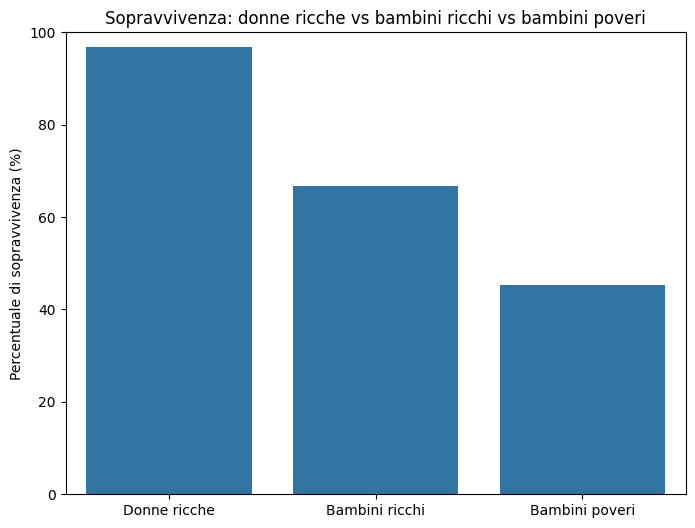

In [92]:
gruppi = ['Donne ricche', 'Bambini ricchi', 'Bambini poveri']
percentuali = [
    donne_ricche['Survived'].mean() * 100,
    bambini_ricchi['Survived'].mean() * 100,
    bambini_poveri['Survived'].mean() * 100
]

plt.figure(figsize=(8,6))
sns.barplot(x=gruppi, y=percentuali)
plt.ylabel('Percentuale di sopravvivenza (%)')
plt.title('Sopravvivenza: donne ricche vs bambini ricchi vs bambini poveri')
plt.ylim(0, 100)
plt.show()

In [95]:
uomini_ricchi = df[(df['Sex'] == 'male') & (df['Pclass'] == 1)]

bins = [0, 12, 20, 30, 40, 50, 60, 120]
labels = ['0-12', '12-20', '20-30', '30-40', '40-50', '50-60', '60+']

uomini_ricchi['Age_group'] = pd.cut(uomini_ricchi['Age'], bins=bins, labels=labels, right=False)
survival_by_age = uomini_ricchi.groupby('Age_group')['Survived'].mean() * 100
survival_by_age



C:\Users\Gianmario\AppData\Local\Temp\ipykernel_9364\2155076491.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uomini_ricchi['Age_group'] = pd.cut(uomini_ricchi['Age'], bins=bins, labels=labels, right=False)
C:\Users\Gianmario\AppData\Local\Temp\ipykernel_9364\2155076491.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = uomini_ricchi.groupby('Age_group')['Survived'].mean() * 100


Age_group
0-12     100.000000
12-20     25.000000
20-30     50.000000
30-40     52.173913
40-50     37.500000
50-60     26.666667
60+       14.285714
Name: Survived, dtype: float64

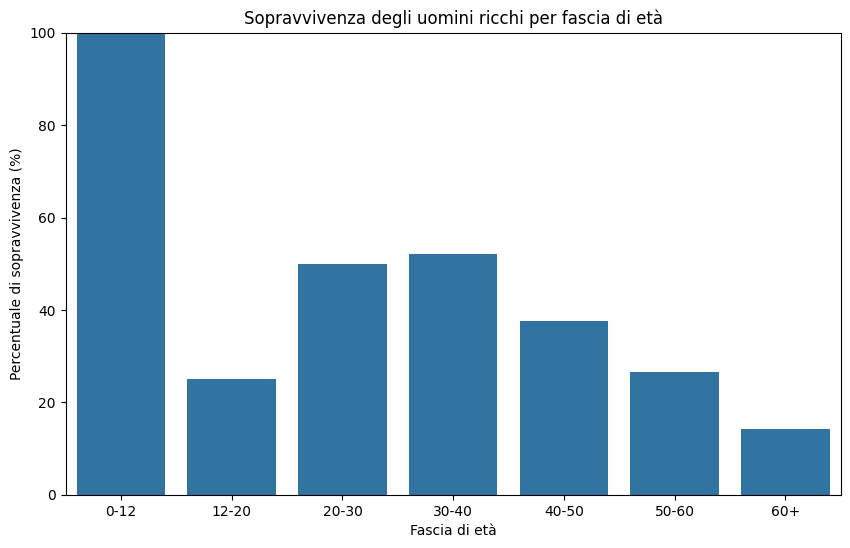

In [96]:
plt.figure(figsize=(10,6))
sns.barplot(x=survival_by_age.index, y=survival_by_age.values)
plt.title('Sopravvivenza degli uomini ricchi per fascia di età')
plt.xlabel('Fascia di età')
plt.ylabel('Percentuale di sopravvivenza (%)')
plt.ylim(0,100)
plt.show()

In [98]:
donne_ricche = df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]

bins = [0, 12, 20, 30, 40, 50, 60, 120]
labels = ['0-12', '12-20', '20-30', '30-40', '40-50', '50-60', '60+']

donne_ricche['Age_group'] = pd.cut(donne_ricche['Age'], bins=bins, labels=labels, right=False)

survival_by_age_women = donne_ricche.groupby('Age_group')['Survived'].mean() * 100
survival_by_age_women



C:\Users\Gianmario\AppData\Local\Temp\ipykernel_9364\2627250469.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donne_ricche['Age_group'] = pd.cut(donne_ricche['Age'], bins=bins, labels=labels, right=False)
C:\Users\Gianmario\AppData\Local\Temp\ipykernel_9364\2627250469.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_women = donne_ricche.groupby('Age_group')['Survived'].mean() * 100


Age_group
0-12       0.000000
12-20    100.000000
20-30     93.750000
30-40    100.000000
40-50    100.000000
50-60     91.666667
60+      100.000000
Name: Survived, dtype: float64

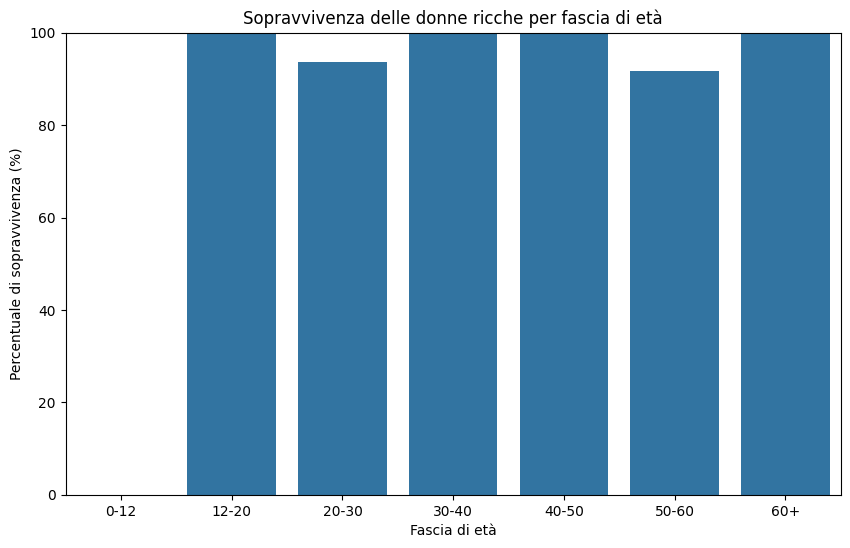

In [99]:
plt.figure(figsize=(10,6))
sns.barplot(x=survival_by_age_women.index, y=survival_by_age_women.values)
plt.title('Sopravvivenza delle donne ricche per fascia di età')
plt.xlabel('Fascia di età')
plt.ylabel('Percentuale di sopravvivenza (%)')
plt.ylim(0,100)
plt.show()

In [109]:
bambine_ricche_morte = df[
    (df['Sex'] == 'female') &
    (df['Pclass'] == 1) &
    (df['Age'] < 12) &
    (df['Survived'] == 0)
]

bambine_ricche_morte


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_num,Age_bin,Age_group
297,0,1,female,2.0,1,2,151.55,S,0,"(0.34, 8.378]",0-9


In [108]:
bambine_ricche_morte.shape[0]


0

Percentuale sopravvivenza bambini NON ricchi (Pclass 2): 100.0
Percentuale sopravvivenza bambini poveri (Pclass 3): 40.42553191489361


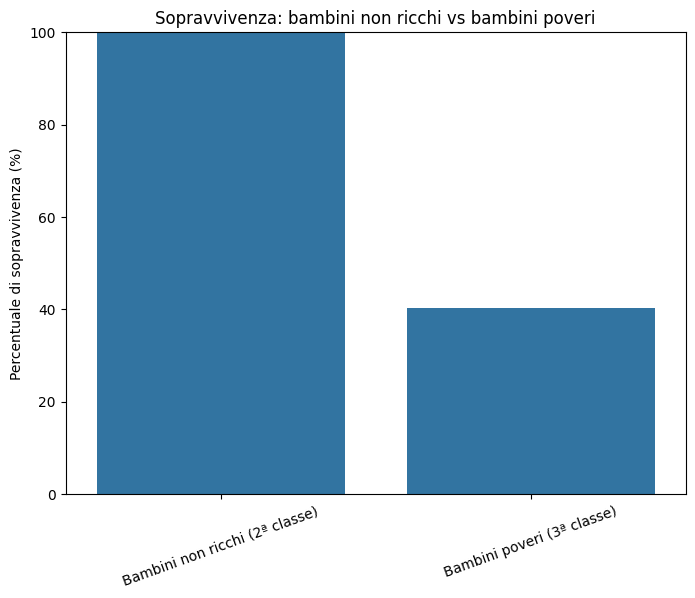

In [110]:
# Definizione bambini
df_bambini = df[df['Age'] < 12]

# Bambini NON ricchi (seconda classe)
bambini_non_ricchi = df_bambini[df_bambini['Pclass'] == 2]

# Bambini poveri (terza classe)
bambini_poveri = df_bambini[df_bambini['Pclass'] == 3]

# Percentuali di sopravvivenza
surv_non_ricchi = bambini_non_ricchi['Survived'].mean() * 100
surv_poveri = bambini_poveri['Survived'].mean() * 100

print("Percentuale sopravvivenza bambini NON ricchi (Pclass 2):", surv_non_ricchi)
print("Percentuale sopravvivenza bambini poveri (Pclass 3):", surv_poveri)

# Grafico comparativo
gruppi = ['Bambini non ricchi (2ª classe)', 'Bambini poveri (3ª classe)']
percentuali = [surv_non_ricchi, surv_poveri]

plt.figure(figsize=(8,6))
sns.barplot(x=gruppi, y=percentuali)
plt.ylabel('Percentuale di sopravvivenza (%)')
plt.title('Sopravvivenza: bambini non ricchi vs bambini poveri')
plt.ylim(0, 100)
plt.xticks(rotation=20)
plt.show()

Age_group
0-8      53.125000
8-12     13.333333
12-15    42.857143
15-20    25.925926
20-30    23.308271
30-40    21.739130
40+       6.666667
Name: Survived, dtype: float64


C:\Users\Gianmario\AppData\Local\Temp\ipykernel_9364\2778504981.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poveri['Age_group'] = pd.cut(poveri['Age'], bins=bins, labels=labels, right=False)
C:\Users\Gianmario\AppData\Local\Temp\ipykernel_9364\2778504981.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  poveri_survival_rate = poveri.groupby('Age_group')['Survived'].mean() * 100


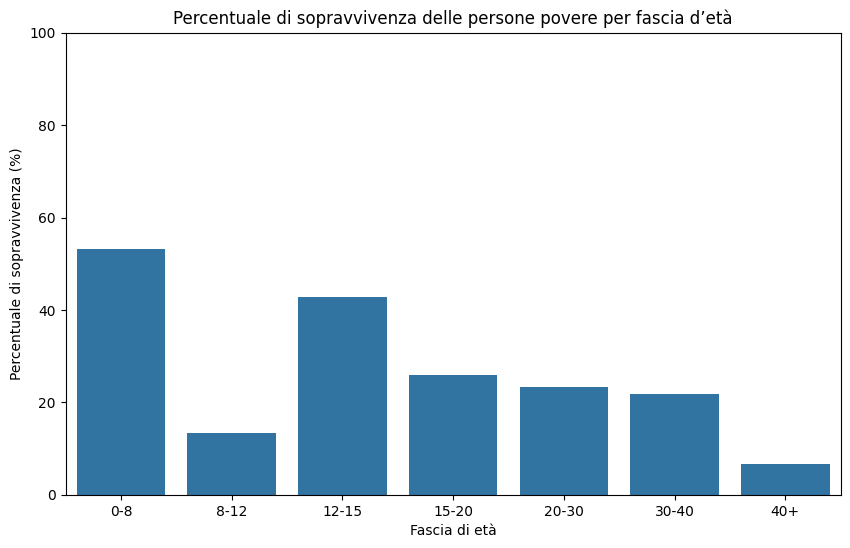

In [111]:
# Selezioniamo le persone povere (Pclass = 3)
poveri = df[df['Pclass'] == 3]

# Definizione delle fasce d'età
bins = [0, 8, 12, 15, 20, 30, 40, 120]
labels = ['0-8', '8-12', '12-15', '15-20', '20-30', '30-40', '40+']

# Creazione della variabile Age_group
poveri['Age_group'] = pd.cut(poveri['Age'], bins=bins, labels=labels, right=False)

# Calcolo della percentuale di sopravvivenza per fascia
poveri_survival_rate = poveri.groupby('Age_group')['Survived'].mean() * 100

print(poveri_survival_rate)

# Grafico
plt.figure(figsize=(10,6))
sns.barplot(x=poveri_survival_rate.index, y=poveri_survival_rate.values)
plt.title('Percentuale di sopravvivenza delle persone povere per fascia d’età')
plt.xlabel('Fascia di età')
plt.ylabel('Percentuale di sopravvivenza (%)')
plt.ylim(0,100)
plt.show()

Sex           female       male
Age_group                      
0-8        68.750000  37.500000
8-12        0.000000  25.000000
12-15      50.000000  33.333333
15-20      61.111111   8.333333
20-30      48.387097  15.686275
30-40      43.750000  15.094340
40+        10.000000   5.714286


C:\Users\Gianmario\AppData\Local\Temp\ipykernel_9364\995139964.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poveri['Age_group'] = pd.cut(poveri['Age'], bins=bins, labels=labels, right=False)
C:\Users\Gianmario\AppData\Local\Temp\ipykernel_9364\995139964.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  poveri_sex_age = poveri.groupby(['Age_group', 'Sex'])['Survived'].mean() * 100


<Figure size 1200x600 with 0 Axes>

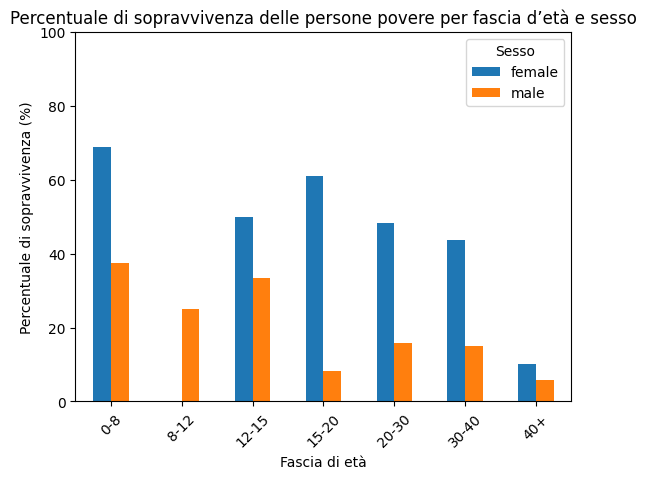

In [112]:
# Selezioniamo solo i poveri (Pclass = 3)
poveri = df[df['Pclass'] == 3]

# Definizione delle fasce d'età
bins = [0, 8, 12, 15, 20, 30, 40, 120]
labels = ['0-8', '8-12', '12-15', '15-20', '20-30', '30-40', '40+']

# Creazione delle fasce
poveri['Age_group'] = pd.cut(poveri['Age'], bins=bins, labels=labels, right=False)

# Calcolo percentuali di sopravvivenza per fascia d'età e sesso
poveri_sex_age = poveri.groupby(['Age_group', 'Sex'])['Survived'].mean() * 100
poveri_sex_age = poveri_sex_age.unstack()   # colonne separate per Sex

print(poveri_sex_age)

# --- GRAFICO ---
plt.figure(figsize=(12,6))
poveri_sex_age.plot(kind='bar')
plt.title('Percentuale di sopravvivenza delle persone povere per fascia d’età e sesso')
plt.xlabel('Fascia di età')
plt.ylabel('Percentuale di sopravvivenza (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.legend(title='Sesso')
plt.show()

In [113]:
# Donne povere (female, Pclass = 3)
donne_povere = df[(df['Sex'] == 'female') & (df['Pclass'] == 3)]

# Uomini ricchi (male, Pclass = 1)
uomini_ricchi = df[(df['Sex'] == 'male') & (df['Pclass'] == 1)]

# Percentuali di sopravvivenza
surv_donne_povere = donne_povere['Survived'].mean() * 100
surv_uomini_ricchi = uomini_ricchi['Survived'].mean() * 100

print("Percentuale sopravvivenza donne povere:", surv_donne_povere)
print("Percentuale sopravvivenza uomini ricchi:", surv_uomini_ricchi)

Percentuale sopravvivenza donne povere: 50.0
Percentuale sopravvivenza uomini ricchi: 36.885245901639344


In [114]:
# Variabile bambino (1 = Age < 12, 0 = altrimenti)
df['bambino'] = (df['Age'] < 12).astype(int)

# Variabile molto_vecchio (1 = Age > 65, 0 = altrimenti)
df['molto_vecchio'] = (df['Age'] > 65).astype(int)


In [118]:
df = df.drop(columns=['Age_bin', 'Age_group'])


In [121]:
# ==============================
# 1. Separiamo X e y dal df
# ==============================
# ATTENZIONE: qui assumo che tu abbia ancora 'Survived' in df
# e che tu abbia già tolto le colonne che non vuoi usare.
y = df['Survived']
X = df.drop(columns=['Survived'])

# ==============================
# 2. Train-test split (con stratify per mantenere proporzioni)
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ==============================
# 3. Calcolo mediane di Age per Pclass SOLO sul train
# ==============================
median_age_by_class = X_train.groupby('Pclass')['Age'].median()
print("Mediana di Age per Pclass (calcolata sul train):")
print(median_age_by_class)

# ==============================
# 4. Imputazione di Age nel TRAIN
# ==============================
X_train['Age'] = X_train['Age'].fillna(
    X_train['Pclass'].map(median_age_by_class)
)

# ==============================
# 5. Imputazione di Age nel TEST
# (usando SEMPRE le mediane del train)
# ==============================
X_test['Age'] = X_test['Age'].fillna(
    X_test['Pclass'].map(median_age_by_class)
)

# ==============================
# 6. Ricreiamo le variabili 'bambino' e 'molto_vecchio'
#    dopo l'imputazione, separatamente per train e test
# ==============================
X_train['bambino'] = (X_train['Age'] < 12).astype(int)
X_train['molto_vecchio'] = (X_train['Age'] > 65).astype(int)

X_test['bambino'] = (X_test['Age'] < 12).astype(int)
X_test['molto_vecchio'] = (X_test['Age'] > 65).astype(int)

# ==============================
# 7. Controllo veloce
# ==============================
print("\nControllo NA in Age dopo imputazione:")
print("Train:", X_train['Age'].isna().sum(), "NA")
print("Test :", X_test['Age'].isna().sum(), "NA")

print("\nEsempio righe train:")
print(X_train[['Pclass', 'Age', 'bambino', 'molto_vecchio']].head())

Mediana di Age per Pclass (calcolata sul train):
Pclass
1    38.0
2    29.0
3    24.0
Name: Age, dtype: float64

Controllo NA in Age dopo imputazione:
Train: 0 NA
Test : 0 NA

Esempio righe train:
     Pclass   Age  bambino  molto_vecchio
692       3  24.0        0              0
481       2  29.0        0              0
527       1  38.0        0              0
855       3  18.0        0              0
801       2  31.0        0              0


In [140]:


# ==============================
# 1. Separiamo X e y dal df
# ==============================
# ATTENZIONE: qui assumo che tu abbia ancora 'Survived' in df
# e che tu abbia già tolto le colonne che non vuoi usare.
y = df['Survived']
X = df.drop(columns=['Survived'])

# ==============================
# 2. Train-test split (con stratify per mantenere proporzioni)
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=5,
    stratify=y
)

# ==============================
# 3. Calcolo mediane di Age per Pclass SOLO sul train
# ==============================
median_age_by_class = X_train.groupby('Pclass')['Age'].median()
print("Mediana di Age per Pclass (calcolata sul train):")
print(median_age_by_class)

# ==============================
# 4. Imputazione di Age nel TRAIN
# ==============================
X_train['Age'] = X_train['Age'].fillna(
    X_train['Pclass'].map(median_age_by_class)
)

# ==============================
# 5. Imputazione di Age nel TEST
# (usando SEMPRE le mediane del train)
# ==============================
X_test['Age'] = X_test['Age'].fillna(
    X_test['Pclass'].map(median_age_by_class)
)

# ==============================
# 6. Ricreiamo le variabili 'bambino' e 'molto_vecchio'
#    dopo l'imputazione, separatamente per train e test
# ==============================
X_train['bambino'] = (X_train['Age'] < 12).astype(int)
X_train['molto_vecchio'] = (X_train['Age'] > 65).astype(int)

X_test['bambino'] = (X_test['Age'] < 12).astype(int)
X_test['molto_vecchio'] = (X_test['Age'] > 65).astype(int)

# ==============================
# 7. Controllo veloce
# ==============================
print("\nControllo NA in Age dopo imputazione:")
print("Train:", X_train['Age'].isna().sum(), "NA")
print("Test :", X_test['Age'].isna().sum(), "NA")

print("\nEsempio righe train:")
print(X_train[['Pclass', 'Age', 'bambino', 'molto_vecchio']].head())


Mediana di Age per Pclass (calcolata sul train):
Pclass
1    38.0
2    30.0
3    24.0
Name: Age, dtype: float64

Controllo NA in Age dopo imputazione:
Train: 0 NA
Test : 0 NA

Esempio righe train:
     Pclass   Age  bambino  molto_vecchio
559       3  36.0        0              0
115       3  21.0        0              0
566       3  19.0        0              0
366       1  60.0        0              0
514       3  24.0        0              0


In [141]:
import optuna
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [142]:
categorical_features = ['Sex', 'Embarked', 'Pclass']  # Pclass trattata come categorica
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', 'bambino', 'molto_vecchio']

# Trasformatore: OrdinalEncoder per categoriche, passthrough per numeriche
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# ============================
# 7. DEFINIZIONE PIPELINE BASE (PREPROCESSOR + RANDOM FOREST)
# ============================
def make_pipeline(trial):
    # Suggerimento iperparametri da Optuna
    n_estimators = trial.suggest_int('n_estimators', 100, 600)
    max_depth = trial.suggest_int('max_depth', 2, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', rf)
    ])

    return pipe

# ============================
# 8. DEFINIZIONE FUNZIONE OBIETTIVO PER OPTUNA
# ============================
def objective(trial):
    pipe = make_pipeline(trial)
    # cross-validation su X_train, y_train
    scores = cross_val_score(
        pipe,
        X_train, y_train,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    return scores.mean()

# ============================
# 9. LANCIO DI OPTUNA
# ============================
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=40)   # puoi aumentare n_trials (es. 80, 100) se vuoi

print("\n=== RISULTATI OPTUNA ===")
print("Miglior score in CV:", study.best_value)
print("Migliori parametri:", study.best_params)

# ============================
# 10. TRAIN DEL MIGLIOR MODELLO SU TUTTO IL TRAIN
# ============================
best_trial = study.best_trial
best_pipe = make_pipeline(best_trial)

best_pipe.fit(X_train, y_train)

# ============================
# 11. VALUTAZIONE SU TEST SET
# ============================
y_pred = best_pipe.predict(X_test)

print("\n=== VALUTAZIONE SU TEST SET ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred))

[I 2025-12-05 13:26:12,204] A new study created in memory with name: no-name-287878f3-1d70-4791-aec4-4b5ea5573a32
[I 2025-12-05 13:26:17,200] Trial 0 finished with value: 0.821609376538954 and parameters: {'n_estimators': 100, 'max_depth': 21, 'min_samples_split': 15, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.821609376538954.
[I 2025-12-05 13:26:20,908] Trial 1 finished with value: 0.8201910765291046 and parameters: {'n_estimators': 197, 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.821609376538954.
[I 2025-12-05 13:26:21,797] Trial 2 finished with value: 0.8215699793164584 and parameters: {'n_estimators': 194, 'max_depth': 21, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.821609376538954.
[I 2025-12-05 13:26:22,584] Trial 3 finished with value: 0.8174037230375258 and parameters: {'n_estimators': 238, 'max_depth': 18, 'min


=== RISULTATI OPTUNA ===
Miglior score in CV: 0.8300600807643062
Migliori parametri: {'n_estimators': 214, 'max_depth': 27, 'min_samples_split': 16, 'min_samples_leaf': 4, 'max_features': 'sqrt'}

=== VALUTAZIONE SU TEST SET ===
Accuracy: 0.8268156424581006

Confusion matrix:
[[103   7]
 [ 24  45]]

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       110
           1       0.87      0.65      0.74        69

    accuracy                           0.83       179
   macro avg       0.84      0.79      0.81       179
weighted avg       0.83      0.83      0.82       179



In [143]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from xgboost import XGBClassifier
import optuna

In [144]:
# ============================================
# 7. FUNZIONE PER COSTRUIRE LA PIPELINE XGBOOST
# ============================================
def make_xgb_pipeline(trial):
    # Hyperparametri suggeriti da Optuna
    n_estimators = trial.suggest_int('n_estimators', 100, 600)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    min_child_weight = trial.suggest_float('min_child_weight', 1.0, 10.0)
    gamma = trial.suggest_float('gamma', 0.0, 5.0)

    xgb = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        min_child_weight=min_child_weight,
        gamma=gamma,
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1,
        tree_method='hist'
    )

    pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', xgb)
    ])

    return pipe

# ============================================
# 8. FUNZIONE OBIETTIVO PER OPTUNA
# ============================================
def objective(trial):
    pipe = make_xgb_pipeline(trial)
    scores = cross_val_score(
        pipe,
        X_train, y_train,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    return scores.mean()

# ============================================
# 9. LANCIO DI OPTUNA
# ============================================
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=40)  # puoi aumentare a 80/100 se vuoi raffinare

print("\n=== RISULTATI OPTUNA (XGBoost) ===")
print("Miglior score in CV:", study.best_value)
print("Migliori parametri:", study.best_params)

# ============================================
# 10. ALLENAMENTO FINALE DEL MIGLIOR MODELLO SU TUTTO IL TRAIN
# ============================================
best_trial = study.best_trial
best_pipe = make_xgb_pipeline(best_trial)

best_pipe.fit(X_train, y_train)

# ============================================
# 11. VALUTAZIONE SU TEST SET
# ============================================
y_pred = best_pipe.predict(X_test)

print("\n=== VALUTAZIONE XGBOOST SU TEST SET ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred))

[I 2025-12-05 13:27:28,905] A new study created in memory with name: no-name-2d20a850-9fc6-4345-b597-709090315113
[I 2025-12-05 13:27:29,108] Trial 0 finished with value: 0.8146163695459471 and parameters: {'n_estimators': 516, 'max_depth': 11, 'learning_rate': 0.09901946166186511, 'subsample': 0.9706210221221991, 'colsample_bytree': 0.9741505607301568, 'min_child_weight': 3.2159338688454486, 'gamma': 1.7655379307037455}. Best is trial 0 with value: 0.8146163695459471.
[I 2025-12-05 13:27:29,245] Trial 1 finished with value: 0.79068255687974 and parameters: {'n_estimators': 182, 'max_depth': 8, 'learning_rate': 0.011165355827065331, 'subsample': 0.6031834599223672, 'colsample_bytree': 0.6685616217628245, 'min_child_weight': 5.099718450831033, 'gamma': 4.956136288016476}. Best is trial 0 with value: 0.8146163695459471.
[I 2025-12-05 13:27:29,357] Trial 2 finished with value: 0.8061755146262188 and parameters: {'n_estimators': 223, 'max_depth': 11, 'learning_rate': 0.03926219035635497, '


=== RISULTATI OPTUNA (XGBoost) ===
Miglior score in CV: 0.8370432384516893
Migliori parametri: {'n_estimators': 318, 'max_depth': 8, 'learning_rate': 0.03500593889011675, 'subsample': 0.7937216667848305, 'colsample_bytree': 0.747394879022042, 'min_child_weight': 2.9356949910542625, 'gamma': 0.013706148664923146}

=== VALUTAZIONE XGBOOST SU TEST SET ===
Accuracy: 0.8156424581005587

Confusion matrix:
[[97 13]
 [20 49]]

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

